* **Introduction**

I am using RNN method to predict the BTC price. 

In [1]:
# First step, import libraries.
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

*** Import the datasets.**

Second, import the dataset. After reviewing the dataset, I think I need to recode the datetime since it is better to use the dataset sorted by date not by minutes. Then I group the dataset by date and take the average price of all minutes in the day as the price of the day.

In [2]:
# Import the dataset and encode the date
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

*** Split the dataset.** 

I want to predict the BTC price for a month, so I take the data of last 30 days as the test set

In [3]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

*** Process Data**

I feature scale the data and reshape it since I want to use Keras

In [4]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

* **Building the model **

I build the RNN model using Keras. Choose some appropriate parameters

In [7]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)


Train on 1434 samples
Epoch 1/100
1434/1434 [==============================] - 1s 905us/sample - loss: 0.0959
Epoch 2/100
1434/1434 [==============================] - 0s 289us/sample - loss: 0.0336
Epoch 3/100
1434/1434 [==============================] - 0s 304us/sample - loss: 0.0298
Epoch 4/100
1434/1434 [==============================] - 0s 295us/sample - loss: 0.0259
Epoch 5/100
1434/1434 [==============================] - 0s 297us/sample - loss: 0.0218
Epoch 6/100
1434/1434 [==============================] - 0s 294us/sample - loss: 0.0175
Epoch 7/100
1434/1434 [==============================] - 0s 303us/sample - loss: 0.0132
Epoch 8/100
1434/1434 [==============================] - 0s 333us/sample - loss: 0.0091
Epoch 9/100
1434/1434 [==============================] - 0s 321us/sample - loss: 0.0058
Epoch 10/100
1434/1434 [==============================] - 1s 379us/sample - loss: 0.0033
Epoch 11/100
1434/1434 [==============================] - 1s 376us/sample - loss: 0.0017
Epoch 12

* **Prediction**

Notice that I only predict the price of the next day using the price today. Since there must be a lot of influence factors and it must have a lot of error when you predict a longer time.

In [8]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


* **Visualising**

Plot the predicted price and the real price. Compare the diference. The difference is larger when the time is further to the training set. That is why I only want to predict the price of one month

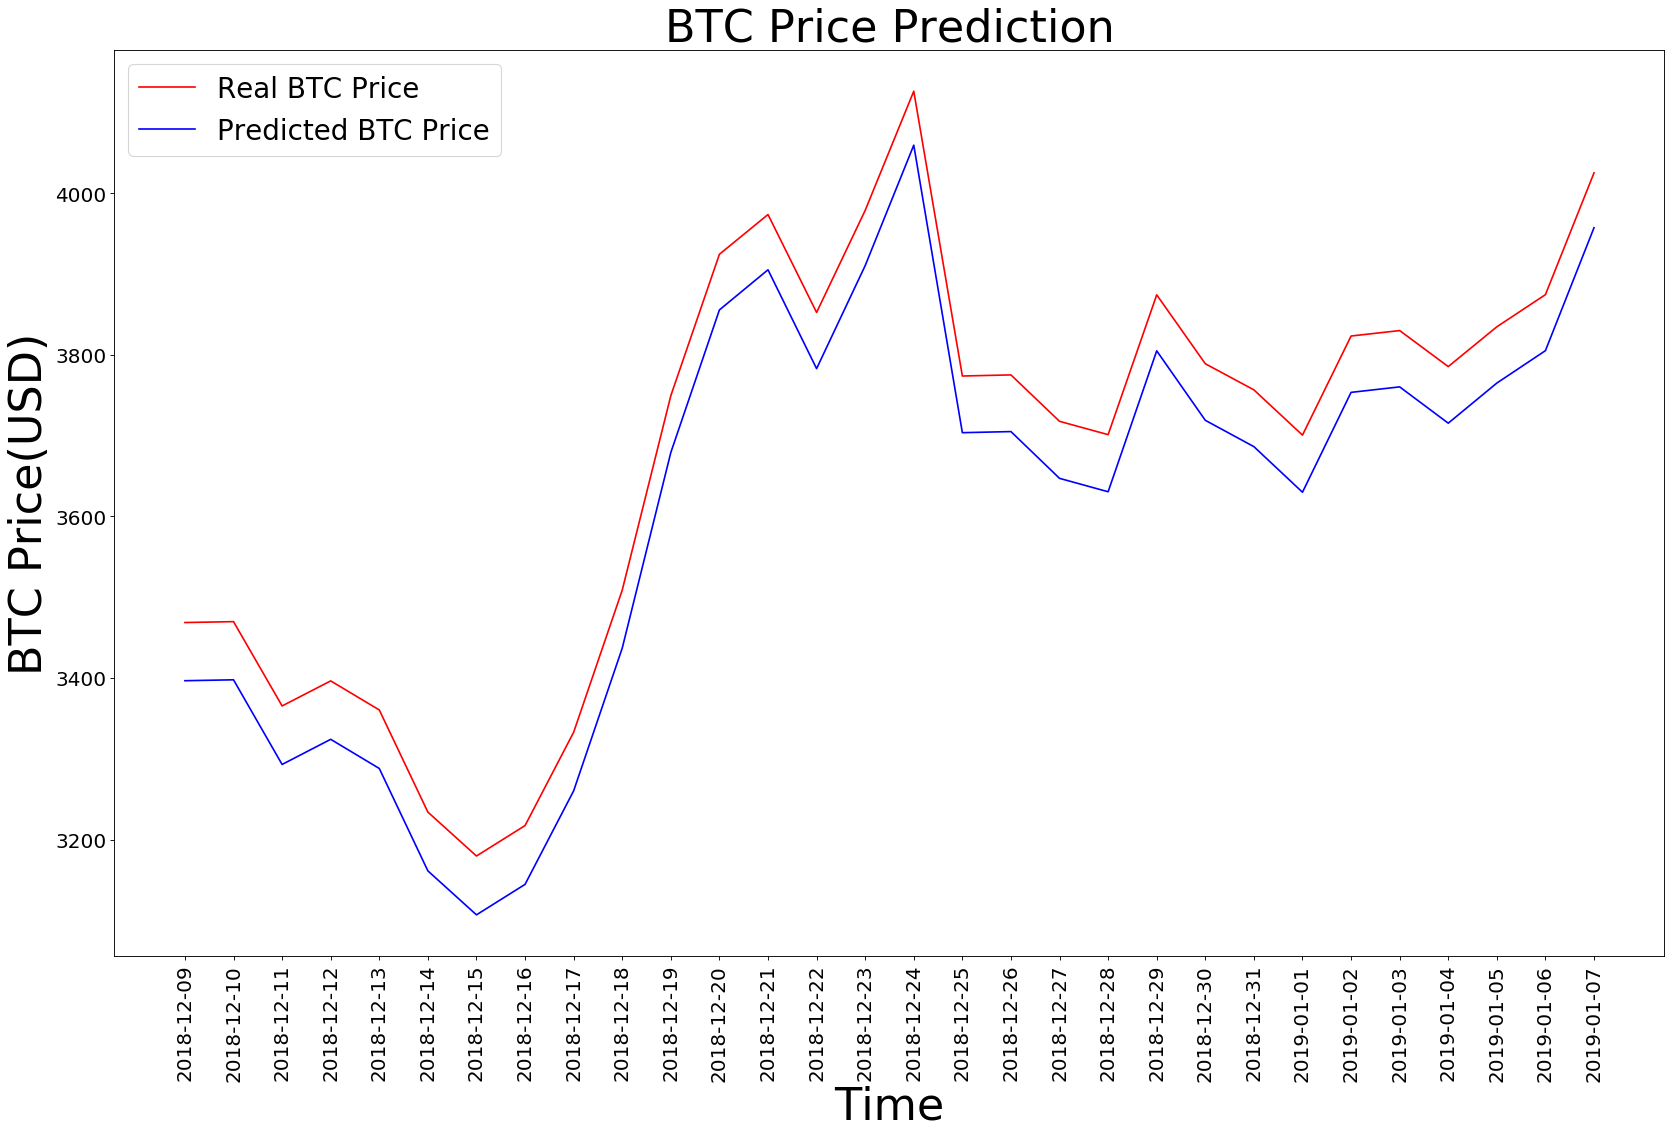

In [10]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**Thank you **